In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv('sales_data_with_discounts.csv')
print(df.head())


         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [6]:
# Identifying numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical Columns:", numerical_cols)

# Basic statistics
for col in numerical_cols:
    print(f"\nStatistics for {col}:")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Standard Deviation:", df[col].std())


Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


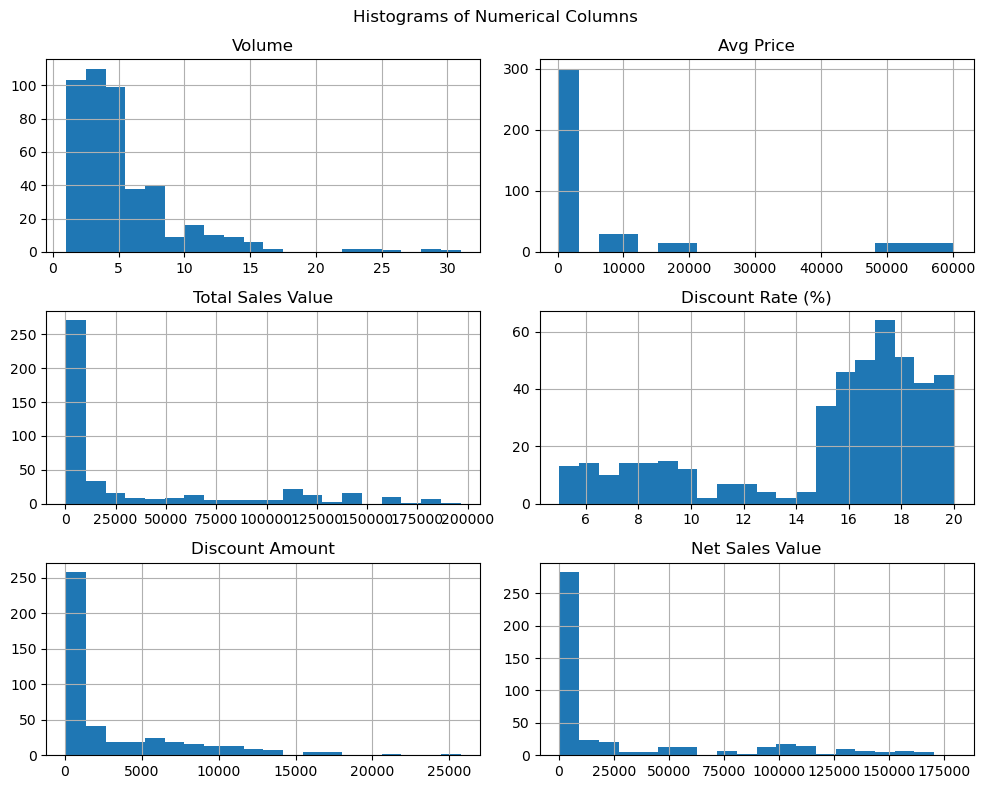

In [8]:
df[numerical_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Columns")
plt.tight_layout()
plt.show()


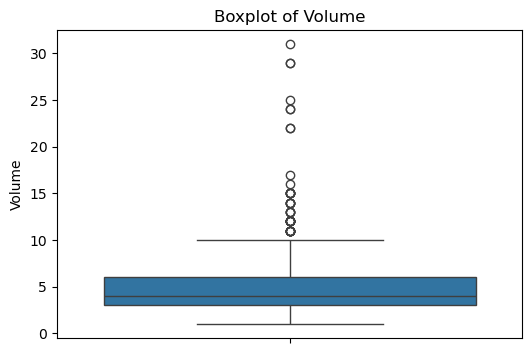

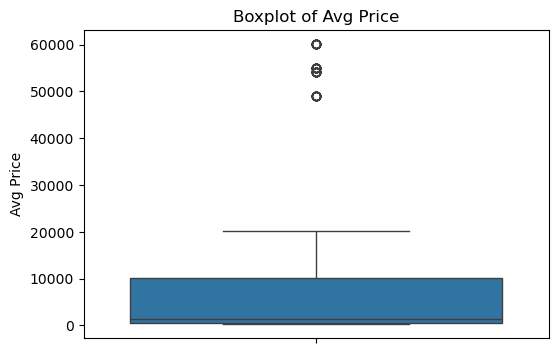

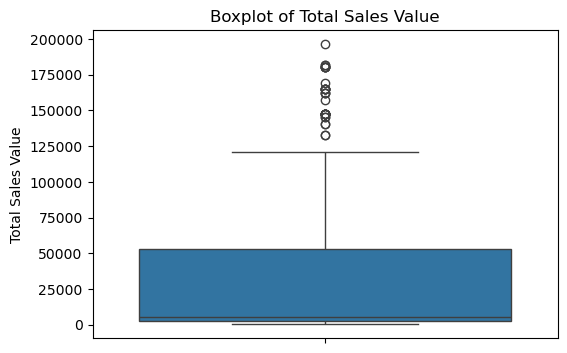

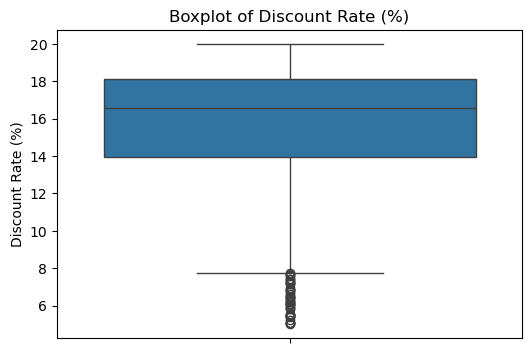

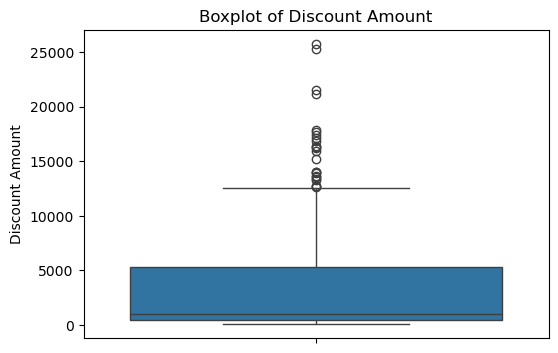

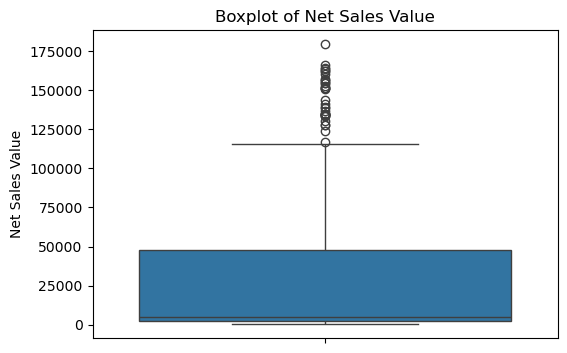

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


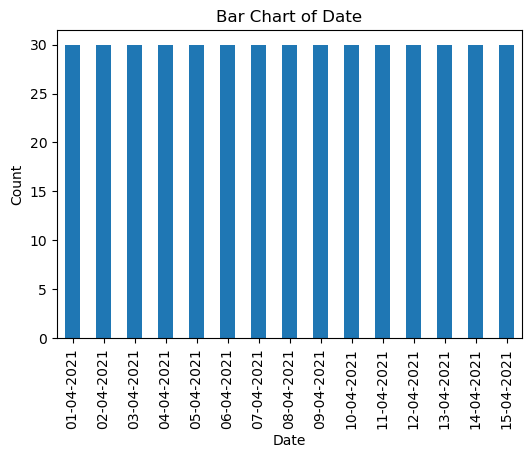

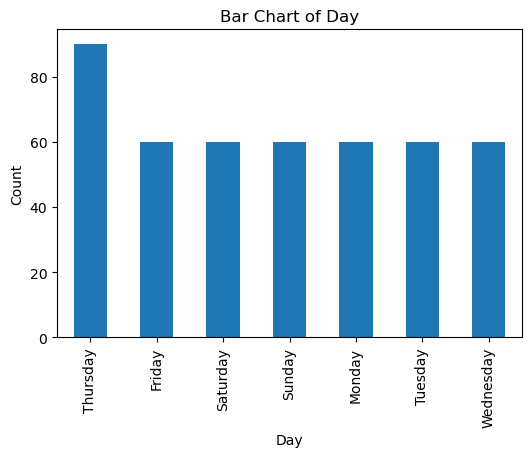

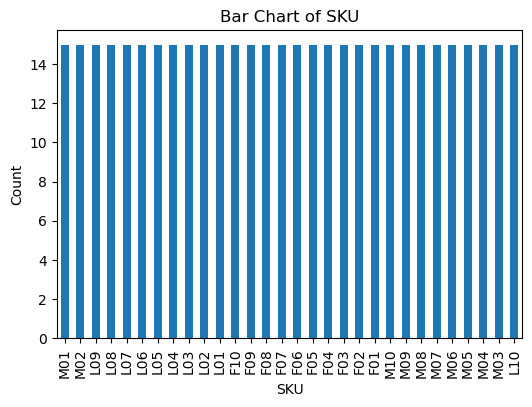

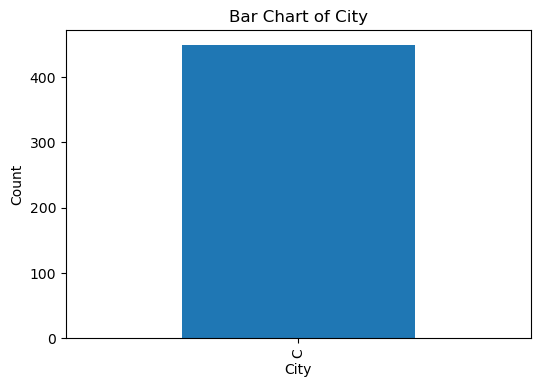

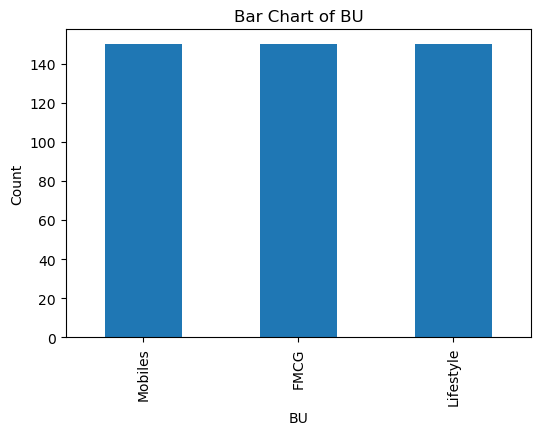

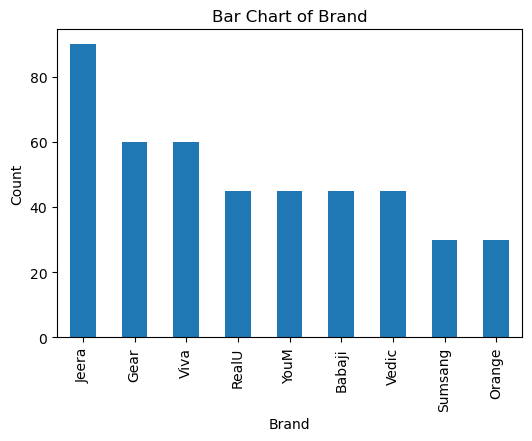

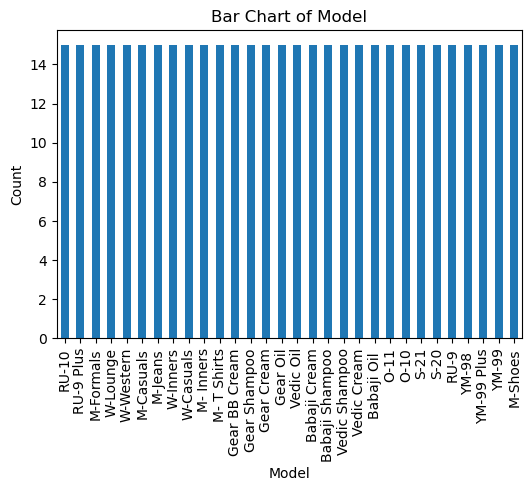

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()

df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Compare before and after
print("Before Standardization:")
print(df[numerical_cols].head())
print("\nAfter Standardization:")
print(df_standardized[numerical_cols].head())


Before Standardization:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146     

In [16]:
df_encoded = pd.get_dummies(df_standardized, columns=categorical_cols)

# Display part of the transformed dataset
print("Encoded Dataset Sample:")
print(df_encoded.head())


Encoded Dataset Sample:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0         2.804756             True            False            False   
1         1.271026             True            False            False   
2         1.545675             True            False            False   
3         1.765810             True            False            False   
4        -0.227595             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_

In [18]:
print("Summary:")
print(f"Original Columns: {df.columns.tolist()}")
print(f"Encoded Columns: {df_encoded.columns.tolist()}")
print("Data preprocessing completed: Standardization and One-Hot Encoding applied.")


Summary:
Original Columns: ['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Encoded Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value', 'Date_01-04-2021', 'Date_02-04-2021', 'Date_03-04-2021', 'Date_04-04-2021', 'Date_05-04-2021', 'Date_06-04-2021', 'Date_07-04-2021', 'Date_08-04-2021', 'Date_09-04-2021', 'Date_10-04-2021', 'Date_11-04-2021', 'Date_12-04-2021', 'Date_13-04-2021', 'Date_14-04-2021', 'Date_15-04-2021', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'SKU_F01', 'SKU_F02', 'SKU_F03', 'SKU_F04', 'SKU_F05', 'SKU_F06', 'SKU_F07', 'SKU_F08', 'SKU_F09', 'SKU_F10', 'SKU_L01', 'SKU_L02', 'SKU_L03', 'SKU_L04', 'SKU_L05', 'SKU_L06', 'SKU_L07', 'SKU_L08', 'SKU_L09', 'SKU_L10', 'SKU_M01', 'SKU_M02', 'SKU_M03', 'SKU_M04', 'SKU_M05', 'SKU_M06', 'SKU_M07', 'SKU_M